Die lineare Regression ist eine grundlegende Methode der Statistik und des maschinellen Lernens, um den Zusammenhang zwischen einer abhängigen Variablen (oft "y" genannt) und einer oder mehreren unabhängigen Variablen (oft "x" genannt) zu modellieren.

---
# Theorie und mathematische Grundlagen

Die lineare Regression basiert auf der Annahme, dass eine lineare Beziehung zwischen der abhängigen Variablen $ y$  und den unabhängigen Variablen  $x_1, x_2, ..., x_n  $ existiert. Das Modell wird durch die folgende Gleichung beschrieben:

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$

- $ y $: Abhängige Variable (Zielvariable)
- $ x_1, x_2, ..., x_n $: Unabhängige Variablen (Prädiktoren)
- $ \beta_0 $: Achsenabschnitt (Konstante)
- $ \beta_1, \beta_2, ..., \beta_n $: Regressionskoeffizienten (Steigungen)
- $ \epsilon $: Zufälliger Fehlerterm (Residual), der die Abweichung vom linearen Modell beschreibt

Ziel der linearen Regression ist es, die Werte für $ \beta_0, \beta_1, \ldots, \beta_n $ so zu schätzen, dass die Summe der quadratischen Abweichungen zwischen den vorhergesagten Werten und den tatsächlichen Beobachtungen minimiert wird. Diese Methode wird "Methode der kleinsten Quadrate" genannt.

---
# Annahmen der linearen Regression
Damit die lineare Regression zuverlässige Ergebnisse liefert, müssen bestimmte Annahmen erfüllt sein:
   
- **Linearität**: Die Beziehung zwischen den unabhängigen Variablen und der abhängigen Variablen muss linear sein.
- **Unabhängigkeit**: Die Beobachtungen müssen unabhängig voneinander sein.
- **Homoskedastizität**: Die Varianz der Fehler sollte über alle Werte der unabhängigen Variablen konstant bleiben.
- **Normalverteilung der Residuen**: Die Fehler sollten normalverteilt sein (insbesondere für Konfidenzintervalle und Hypothesentests relevant).

Hier ein Beispiel für eine einfache lineare Regression in Python mit dem `scikit-learn`-Paket:

Achsenabschnitt (Intercept): 4.206340188711437
Steigung (Coefficient): 2.99025910100489
Mean Squared Error: 0.9177532469714291
R^2 (Bestimmtheitsmaß): 0.6521157503858556


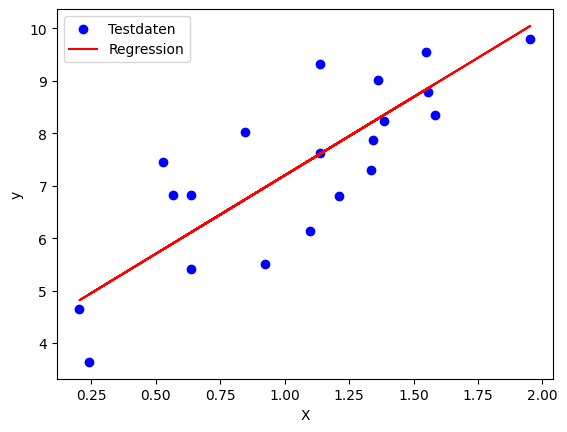

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Beispiel-Daten erstellen
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test-Split (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression anpassen
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Achsenabschnitt (Intercept): {model.intercept_[0]}")
print(f"Steigung (Coefficient): {model.coef_[0][0]}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 (Bestimmtheitsmaß): {r2}")

# Visualisierung der Ergebnisse
plt.scatter(X_test, y_test, color="blue", label="Testdaten")
plt.plot(X_test, y_pred, color="red", label="Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

- Wir erstellen eine Zufallsstichprobe von $ X $Werten und berechnen $ y $ als lineare Funktion von $ X $ mit einem zufälligen Fehler.
- Dann teilen wir die Daten in Trainings- und Testdaten auf.
- Mit `LinearRegression` von `scikit-learn` passen wir das Modell an die Trainingsdaten an.
- Die Vorhersagen werden auf den Testdaten durchgeführt und wir berechnen den Mean Squared Error (MSE) und das Bestimmtheitsmaß $ R^2 $, um die Modellgüte zu beurteilen.
- Schließlich plotten wir die tatsächlichen und vorhergesagten Werte.

# Interpretation der Ergebnisse
- **Achsenabschnitt (Intercept)**: Dies ist der Wert von $ y $ wenn alle $ x $Werte 0 sind.
- **Steigung (Coefficient)**: Dies zeigt an, wie stark sich $ y $ ändert, wenn $ x $ um eine Einheit erhöht wird.
- **Mean Squared Error (MSE)**: Ein Maß für den durchschnittlichen Fehler des Modells. Ein niedrigerer MSE zeigt eine bessere Modellanpassung an.
- **$R^2$ (Bestimmtheitsmaß)**: Misst, wie gut das Modell die Varianz der abhängigen Variablen erklärt. Ein $ R^2 $-Wert nahe 1 bedeutet, dass das Modell eine gute Passform aufweist.

---
# Visualisierung der Homoskedastizität und der Normalverteilung der Residuen

**Homoskedastizität:**<br>
Homoskedastizität bedeutet, dass die Varianz der Residuen über den gesamten Wertebereich der unabhängigen Variablen konstant ist. In deinem Code wird diese Annahme durch einen Residuenplot überprüft, der die Residuen (Differenz zwischen den beobachteten und vorhergesagten Werten) gegen die unabhängige Variable \( X \) aufträgt.


**Q-Q-Plot der Residuen:**<br>
Ein Q-Q-Plot wird verwendet, um zu prüfen, ob die Residuen normalverteilt sind. In der linearen Regression ist die Normalverteilung der Residuen insbesondere für Hypothesentests und die Konstruktion von Konfidenzintervallen relevant.


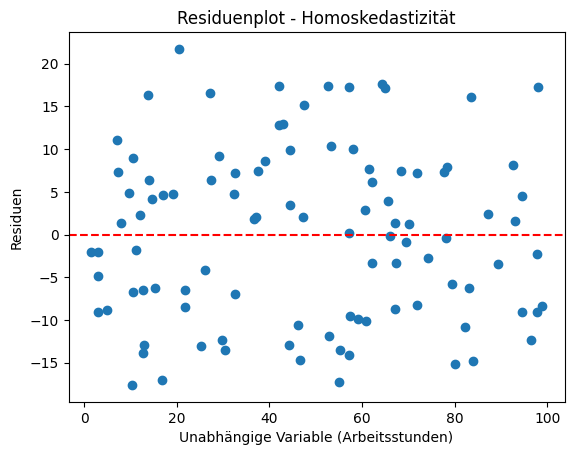

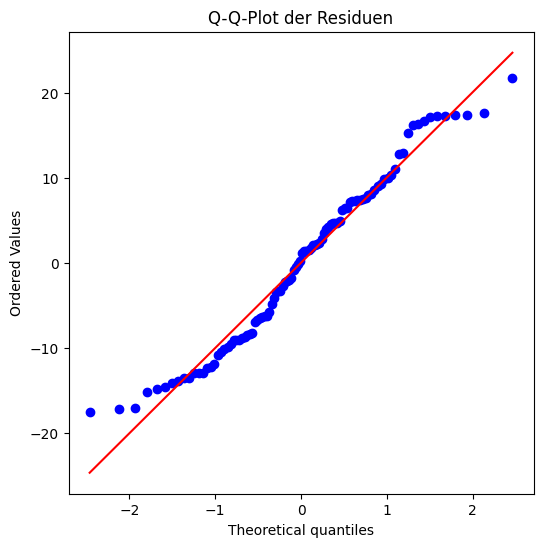

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Beispiel: Homoskedastizität
np.random.seed(0)
n = 100
X = np.random.uniform(1, 100, n).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.normal(0, 10, n)  # Zufällige Fehler mit konstanter Varianz

# Lineare Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuen plotten
residuals = y - y_pred
plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuenplot - Homoskedastizität')
plt.xlabel('Unabhängige Variable (Arbeitsstunden)')
plt.ylabel('Residuen')
plt.show()

# Q-Q-Plot der Residuen
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q-Plot der Residuen')
plt.show()

**Residuenplot**:<br>
Hier wird gezeigt, ob die Varianz der Residuen konstant bleibt (Homoskedastizität).
- Falls die Punkte im Residuenplot gleichmäßig verteilt und zufällig um die rote Linie (Residuenmittelwert = 0) angeordnet sind, spricht das für Homoskedastizität.
- Falls sich die Varianz der Residuen systematisch verändert (z.B. fächerförmig), deutet das auf Heteroskedastizität hin, was die Validität der Regressionsergebnisse beeinträchtigen kann.

<br>

**Q-Q-Plot**:<br>
Dieser Plot überprüft, ob die Residuen normalverteilt sind.
- Wenn die Punkte im Q-Q-Plot nahe einer Geraden liegen, sind die Residuen annähernd normalverteilt.
- Große Abweichungen von der Geraden deuten darauf hin, dass die Residuen nicht normalverteilt sind, was die Modellannahmen verletzen kann.

<br>

Beide Plots helfen dabei, die Gültigkeit der Annahmen der linearen Regression zu überprüfen.

---
# Beispiel: Hauspreise auf Basis der qm-Zahl

Der Code implementiert eine sehr einfache lineare Regression zur Vorhersage von Hauspreisen basierend auf nur einer unabhängigen Variablen, der Quadratmeterzahl.


Mittlerer quadratischer Fehler: 0.0
R^2 Wert: 1.0


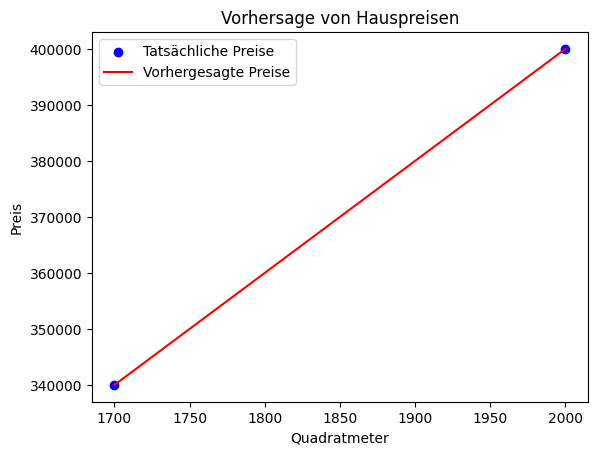

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Beispieldatensatz: Vorhersage von Hauspreisen basierend auf der Quadratmeterzahl
data = pd.DataFrame({
    'Quadratmeter': [1500, 1600, 1700, 1800, 1900, 2000],
    'Preis': [300000, 320000, 340000, 360000, 380000, 400000]
})

# Unabhängige und abhängige Variablen
X = data[['Quadratmeter']] # X -> unabhängige Variable
y = data['Preis'] # y -> abhängige Variable



# Training-Test-Aufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

    # X_train und y_train: Die Daten, die zum Trainieren des Modells verwendet werden (80% des Datensatzes)
    # X_test und y_test: Die Daten, die zur Evaluierung des Modells verwendet werden (20% des Datensatzes)
    # test_size=0.2 bedeutet, dass 20% der Daten für den Test verwendet werden
    # random_state=0 stellt sicher, dass die Aufteilung reproduzierbar ist



# Lineares Regressionsmodell
model = LinearRegression() # Ein neues lineares Regressionsmodell wird erstellt
model.fit(X_train, y_train) # Das Modell wird mit den Trainingsdaten trainiert, um die Beziehung zwischen Quadratmeterzahl und Preis zu lernen



# Vorhersagen
y_pred = model.predict(X_test) 

# Hier wird das Modell verwendet, um Vorhersagen für die Testdaten zu treffen. 
# Es gibt die vorhergesagten Preise für die Quadratmeterzahlen im Testdatensatz zurück


# Auswertung
print("Mittlerer quadratischer Fehler:", mean_squared_error(y_test, y_pred))
    # berechnet den mittleren quadratischen Fehler (MSE), der misst, wie nah die Vorhersagen des Modells den tatsächlichen Werten sind. 
    # Ein niedrigerer MSE bedeutet eine bessere Modellleistung.
print("R^2 Wert:", r2_score(y_test, y_pred))
    # berechnet den Bestimmtheitsmaß R^2, der angibt, wie gut die unabhängige Variable die Varianz der abhängigen Variable erklärt. 
    # ein Wert von 1 bedeutet, dass das Modell die Daten perfekt erklärt
    # ein Wert von 0 bedeutet, dass das Modell keine Verbesserung gegenüber dem Durchschnitt der Zielvariable bietet


# Scatterplot der Testdaten
plt.scatter(X_test, y_test, color='blue', label='Tatsächliche Preise')

# Die Vorhersagen des Modells als Linie
plt.plot(X_test, y_pred, color='red', label='Vorhergesagte Preise')

plt.xlabel('Quadratmeter')
plt.ylabel('Preis')
plt.title('Vorhersage von Hauspreisen')
plt.legend()
plt.show()

**Schritte im Code:**

1. **Datenvorbereitung:**
   - Es wird ein Pandas DataFrame erstellt, das die **Quadratmeterzahl** als unabhängige Variable (`X`) und die **Hauspreise** als abhängige Variable (`y`) enthält.
   - Du verwendest `train_test_split`, um den Datensatz in Trainings- und Testdaten aufzuteilen. 80% der Daten werden zum Trainieren des Modells verwendet, und 20% für die spätere Evaluierung.

2. **Modelltraining:**
   - Ein **lineares Regressionsmodell** wird mit den Trainingsdaten (`X_train` und `y_train`) trainiert. Dabei lernt das Modell, wie die Quadratmeterzahl mit dem Preis zusammenhängt.

3. **Vorhersagen:**
   - Das trainierte Modell wird auf die Testdaten angewendet, um Vorhersagen zu treffen. Es werden die **Preisvorhersagen** für die Quadratmeterzahlen im Testdatensatz (`X_test`) berechnet.

4. **Modellbewertung:**
   - Der **Mittlere quadratische Fehler (Mean Squared Error, MSE)** wird berechnet. Dies ist eine Metrik, die misst, wie stark die Vorhersagen des Modells von den tatsächlichen Preisen abweichen. Ein niedrigerer MSE zeigt eine bessere Modellanpassung an.
   - Der **Bestimmtheitsmaß \( R^2 \)** gibt an, wie gut die unabhängige Variable (Quadratmeterzahl) die Varianz der abhängigen Variablen (Preis) erklärt. Ein \( R^2 \)-Wert von 1 bedeutet, dass das Modell die Daten perfekt erklärt, während ein Wert von 0 darauf hinweist, dass das Modell keine bessere Vorhersage macht als der Mittelwert.


Dieser Plot zeigt:
- Die tatsächlichen Hauspreise (blaue Punkte) und
- Die durch das Modell vorhergesagten Hauspreise (rote Linie).
- Der MSE und der \( R^2 \)-Wert bieten Hinweise auf die Modellgüte. Wenn der \( R^2 \)-Wert nahe 1 liegt, dann erklärt die Quadratmeterzahl den Hauspreis gut.


---
# Beispiel für Fehlerquadratsumme

Dieser Code visualisiert die Anpassung von drei verschiedenen Geraden an eine Punktwolke und zeigt dabei die Fehlerquadratsumme (Sum of Squared Errors, SSE) für jede Gerade. Die Idee hinter der Fehlerquadratsumme ist, die Gesamtabweichung der Punkte von der vorhergesagten Linie zu messen. Ziel ist es, eine Linie zu finden, bei der diese Abweichung minimiert wird.

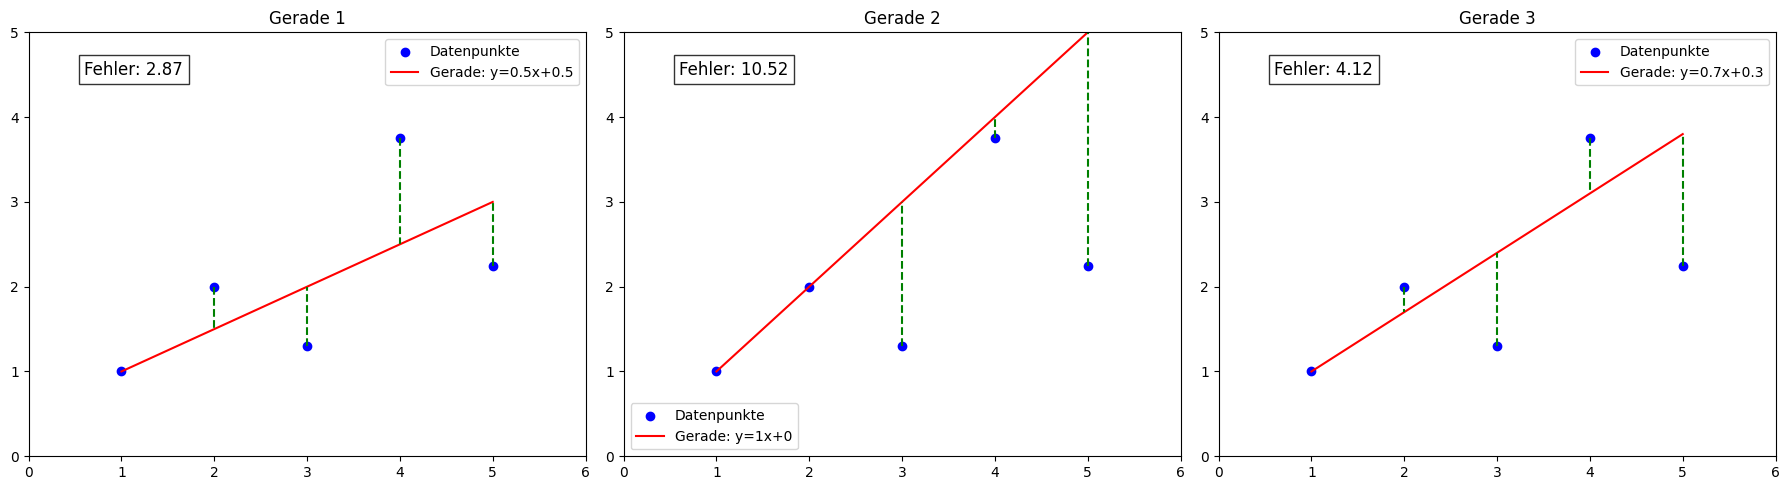

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Daten (Punktwolke) mit 5 Punkten
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])

# Funktion zur Berechnung der Fehlerquadratsumme
def calculate_error(y, y_pred):
    return np.sum((y - y_pred) ** 2)

# Erstellen einer Funktion, um die Fehlerterme zu visualisieren und den Fehlerwert zu berechnen
def plot_line_and_errors(x, y, m, b, ax, label):
    # Linie (Vorhersage)
    y_pred = m * x + b
    # Zeichnen der Punkte
    ax.scatter(x, y, color='blue', label='Datenpunkte')
    # Zeichnen der Geraden
    ax.plot(x, y_pred, color='red', label=f'Gerade: y={m}x+{b}')
    
    # Fehlerterme (Abweichungen)
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='green', linestyle='--', label='_nolegend_')  # grüne gestrichelte Linie
    
    # Fehler berechnen und anzeigen
    error = calculate_error(y, y_pred)
    ax.text(0.1, 0.9, f'Fehler: {error:.2f}', transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
    
    ax.legend()
    ax.set_title(label)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 5)

# Visualisierung der Punktwolke und verschiedenen Geraden
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Erste Gerade: zufällig gewählt
plot_line_and_errors(x, y, m=0.5, b=0.5, ax=axs[0], label='Gerade 1')

# Zweite Gerade: eine andere zufällige Wahl
plot_line_and_errors(x, y, m=1, b=0, ax=axs[1], label='Gerade 2')

# Dritte Gerade: noch eine zufällige Wahl
plot_line_and_errors(x, y, m=0.7, b=0.3, ax=axs[2], label='Gerade 3')

plt.tight_layout()
plt.show()


1. **Datenpunkte**:
   - Die Datenpunkte sind in den Arrays `x` und `y` definiert. Diese repräsentieren eine kleine Punktwolke aus fünf Punkten.
   
2. **Funktion `calculate_error`**:
   - Diese Funktion berechnet die Summe der quadrierten Abweichungen zwischen den tatsächlichen \( y \)-Werten und den vorhergesagten \( y_{\text{pred}} \)-Werten durch die gegebene Gerade.

3. **Funktion `plot_line_and_errors`**:
   - Diese Funktion visualisiert die Punkte, zeichnet die Gerade und markiert die Fehler (Abweichungen der Punkte von der Linie) durch grüne gestrichelte Linien.
   - Die Linie wird durch die Gleichung \( y_{\text{pred}} = m \cdot x + b \) beschrieben, wobei \( m \) die Steigung und \( b \) der Achsenabschnitt ist.
   - Zudem wird die Fehlerquadratsumme für jede Linie berechnet und im Diagramm angezeigt.

4. **Drei verschiedene Geraden**:
   - Es werden drei verschiedene Geraden mit zufälligen Steigungs- und Achsenabschnittswerten gezeichnet:
     - **Gerade 1**: \( y = 0.5x + 0.5 \)
     - **Gerade 2**: \( y = 1x + 0 \)
     - **Gerade 3**: \( y = 0.7x + 0.3 \)
   - Für jede dieser Geraden werden die Fehler als grüne gestrichelte Linien eingezeichnet.

### Was wird gezeigt:

- Die **blaue Punkte** repräsentieren die tatsächlichen Datenpunkte.
- Die **rote Linie** repräsentiert die jeweilige Vorhersagegerade.
- Die **grünen gestrichelten Linien** zeigen die Abweichungen (Fehler) der Punkte von der Linie. Je kürzer die grünen Linien, desto besser passt die Gerade zu den Daten.
- Die **Fehlerquadratsumme (SSE)** wird für jede Gerade berechnet und im jeweiligen Diagramm angezeigt. Diese Summe hilft dabei, die "Qualität" der Linie zu bewerten: Je kleiner der Fehler, desto besser ist die Anpassung.

### Mögliche Erweiterung:

1. Du könntest die Methode der **kleinsten Quadrate** verwenden, um die Linie mit der minimalen Fehlerquadratsumme zu finden, und diese zusätzlich zu den drei zufällig gewählten Linien darstellen.
2. Du könntest den Prozess der Optimierung visualisieren, indem du schrittweise verschiedene Geraden ausprobierst und deren SSE darstellst, um zu zeigen, wie die bestmögliche Anpassung erreicht wird.

Dieser Ansatz eignet sich hervorragend, um die Intuition hinter der linearen Regression zu verdeutlichen, indem die Beziehung zwischen den Daten und der Vorhersagelinie sowie die Fehlergrößen visualisiert werden.